In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from wrangle_zillow import wrangle_zillow

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve


pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 80)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 0 to 77574
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77575 non-null  int64  
 1   parcelid                      77575 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77575 non-null  float64
 6   bedroomcnt                    77575 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49809 non-null  float64
 9   calculatedbathnbr             76960 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77375 non-null  float64
 13  f

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

In [2]:
df= wrangle_zillow()

In [3]:
from sklearn.model_selection import train_test_split
def split_zillow(df):
    # split dataset
    train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
    return train, validate, test    

In [4]:
train, validate, test  = split_zillow(df)
train.shape, validate.shape, test.shape

((39048, 25), (16736, 25), (13946, 25))

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

<i>
    <ol> 
<li> Does log error differ between the 3 counties?
<li> Do houses with more than 3 bedrooms have a higher log error than those with less than three.
<li> Do houses built before 1970 have a lower log error than houses built after 1970?
<li> Do houses with over 2500 square feet have a higher log error than those with less than 2500 square feet?
<li> Do single family residental homes have a higher log error than non single family residental homes?
    </ol></i>

In [5]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
24367,11769189,2.00,4.00,5.00,"1,124.00",6037,"34,006,378.00","-118,251,866.00","5,102.00","60,372,282.20",95992,95992,95992,0.00,1.00,1911,"28,248.00","65,538.00",2016,"37,290.00","4,098.72",0.06,2017-01-19,Floor/Wall,Los_Angeles
13187,11214573,2.00,4.00,8.00,"2,418.00",6037,"34,577,930.00","-118,022,815.00","6,999.00","60,379,107.05",97330,97330,97330,0.00,1.00,2005,"126,184.00","157,726.00",2016,"31,542.00","3,302.59",-0.01,2017-03-30,Central,Los_Angeles
2687,10810570,3.00,3.00,8.00,"1,920.00",6037,"34,150,648.00","-118,594,405.00","6,159.00","60,371,380.00",96387,96387,96387,0.00,1.00,1963,"203,794.00","543,297.00",2016,"339,503.00","6,615.05",-0.04,2017-02-01,Central,Los_Angeles
43357,12739068,2.00,3.00,6.00,"1,540.00",6037,"33,916,099.00","-118,015,323.00","6,386.00","60,375,040.01",96190,96190,96190,0.00,1.00,1959,"51,125.00","83,614.00",2016,"32,489.00","1,339.32",0.01,2017-08-24,Central,Los_Angeles
31528,12144843,3.00,3.00,8.00,"1,721.00",6037,"34,111,932.00","-118,050,371.00","10,845.00","60,374,316.00",96268,96268,96268,0.00,1.00,1958,"61,897.00","101,015.00",2016,"39,118.00","1,369.10",0.05,2017-05-25,Central,Los_Angeles


In [17]:
df.yearbuilt.min()

1878

In [20]:
def get_decade(yearbuilt):
    if yearbuilt >=1870 and yearbuilt <=1879:
        return '1870s'
    elif yearbuilt >=1880 and yearbuilt <=1889:
        return '1880s'
    elif yearbuilt >=1890 and yearbuilt <=1899:
        return '1890s'
    elif yearbuilt >=1900 and yearbuilt <=1909:
        return '1900s'
    elif yearbuilt >=1910 and yearbuilt <=1919:
        return '1910s'
    elif yearbuilt >=1920 and yearbuilt <=1929:
        return '1920s'
    elif yearbuilt >=1930 and yearbuilt <=1939:
        return '1930s'
    elif yearbuilt >=1940 and yearbuilt <=1949:
        return '1940s'
    elif yearbuilt >=1950 and yearbuilt <=1959:
        return '1950s'
    elif yearbuilt >=1960 and yearbuilt <=1969:
        return '1960s'
    elif yearbuilt >=1970 and yearbuilt <=1979:
        return '1970s'
    elif yearbuilt >=1980 and yearbuilt <=1989:
        return '1980s'
    elif yearbuilt >=1990 and yearbuilt <=1999:
        return '1990s'
    elif yearbuilt >=2000 and yearbuilt <= 2009:
        return '2000s'
    elif yearbuilt >= 2010 and yearbuilt <=2019:
        return '2010s'
    
train['decade_built'] = train.yearbuilt.apply(get_decade)

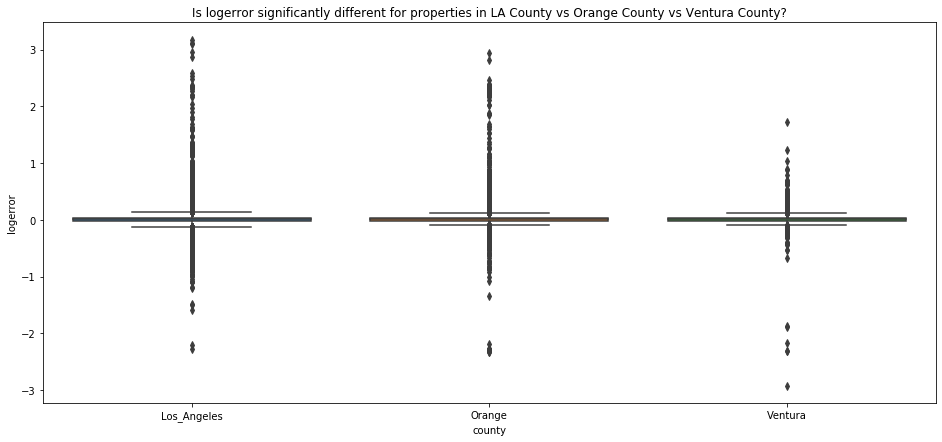

In [7]:
plt.figure(figsize=(16, 7))
sns.boxplot(data = train, x='county', y='logerror')
plt.title('Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?')
plt.show()


<b> Takeaway: </b> <i> There seems to be no difference in logerror for properties in each county but los angeles county seems to have more outliers.

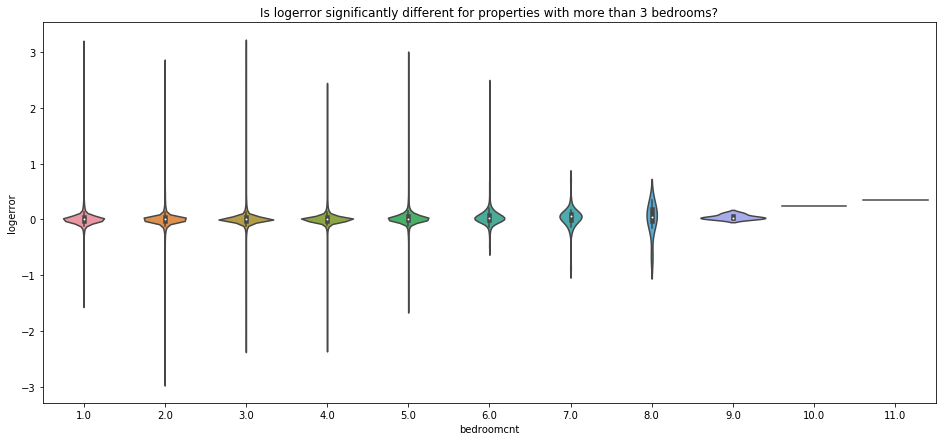

In [11]:
plt.figure(figsize=(16, 7))
sns.violinplot(data = train, x='bedroomcnt', y='logerror')
plt.title('Is logerror significantly different for properties with more than 3 bedrooms?')
plt.show()


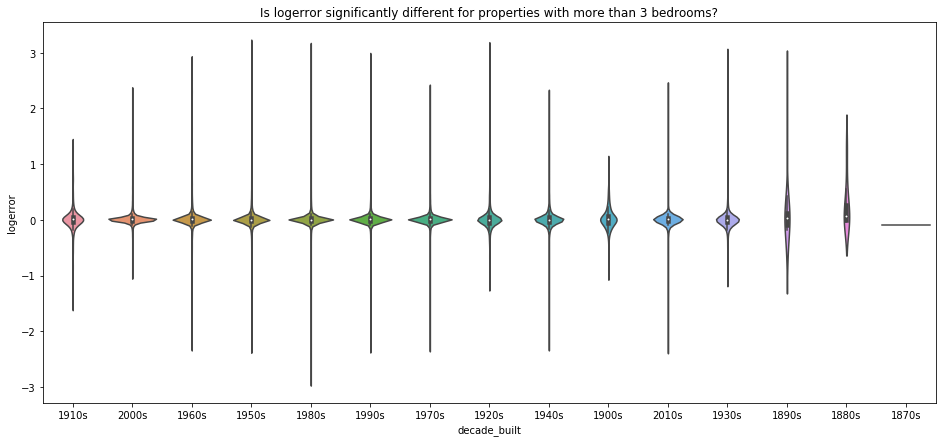

In [22]:
plt.figure(figsize=(16, 7))
sns.violinplot(data = train, x='decade_built', y='logerror')
plt.title('Is logerror significantly different for properties with more than 3 bedrooms?')
plt.show()

Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.